In [81]:
#tensorflow2.0手势识别
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import h5py

In [142]:
def load_dataset():
    train_dataset = h5py.File(r'C:\Users\alex\Desktop\train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(r'C:\Users\alex\Desktop\test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [143]:
train_set_x_ori,train_set_y_ori,test_set_x_ori,test_set_y_ori,classes = load_dataset()

In [144]:
print(train_set_x_ori.shape)
print(train_set_y_ori.shape)
print(train_set_y_ori)
print(classes)

(1080, 64, 64, 3)
(1, 1080)
[[5 0 2 ... 2 4 5]]
[0 1 2 3 4 5]


In [145]:
print(np.max(train_set_x_ori))
print(np.min(train_set_x_ori))

244
4


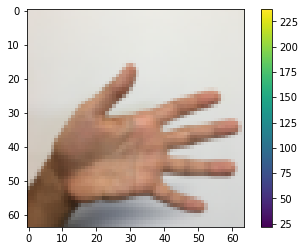

In [146]:
plt.figure()
plt.imshow(train_set_x_ori[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [147]:
train_set_x = train_set_x_ori/255

In [263]:
test_set_x = test_set_x_ori/255
test_set_y = test_set_y_ori.reshape(test_set_y_ori[0].shape,)

In [148]:
train_set_y = train_set_y_ori.reshape(1080,)
print(trian_set_y.shape)

(1080,)


In [264]:
print(test_set_y.shape)

(120,)


In [149]:
print(np.max(train_set_x))

0.9568627450980393


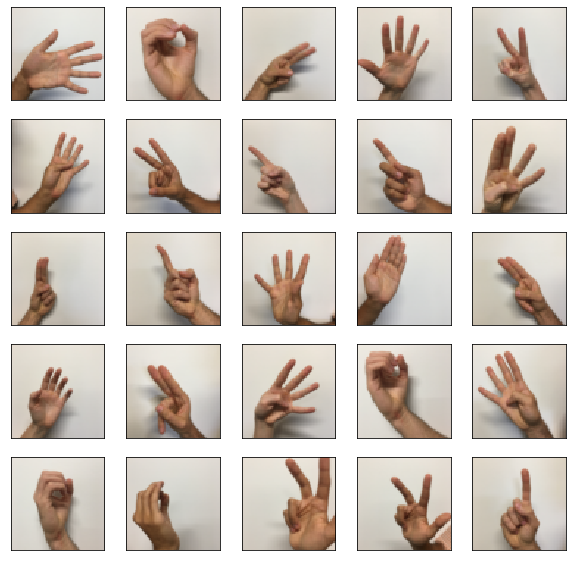

In [150]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set_x[i], cmap=plt.cm.binary)
plt.show()

In [151]:
print(train_set_x.shape)
print(train_set_y.shape)
print(train_set_y)
print(train_set_x.shape)

(1080, 64, 64, 3)
(1080,)
[5 0 2 ... 2 4 5]
(1080, 64, 64, 3)


In [266]:
#设置模型
model = keras.Sequential([keras.layers.Flatten(input_shape=(64,64,3)),keras.layers.Dense(128,activation='relu'),keras.layers.Dense(6,activation='softmax')])

In [267]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_103 (Dense)            (None, 128)               1572992   
_________________________________________________________________
dense_104 (Dense)            (None, 6)                 774       
Total params: 1,573,766
Trainable params: 1,573,766
Non-trainable params: 0
_________________________________________________________________


In [269]:
#进行预设值
model.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer='adam')

In [270]:
model.fit(train_set_x,trian_set_y,batch_size=64,verbose=1,epochs=50)

Train on 1080 samples
Epoch 1/50
1080/1080 [==============================] - 0s 458us/sample - loss: 7.6035 - accuracy: 0.1861
Epoch 2/50
1080/1080 [==============================] - 0s 219us/sample - loss: 2.5943 - accuracy: 0.2343 - loss: 2.7511 - accuracy: 0.22
Epoch 3/50
1080/1080 [==============================] - 0s 210us/sample - loss: 1.7435 - accuracy: 0.3352
Epoch 4/50
1080/1080 [==============================] - 0s 217us/sample - loss: 1.4854 - accuracy: 0.4102
Epoch 5/50
1080/1080 [==============================] - 0s 229us/sample - loss: 1.4428 - accuracy: 0.4157
Epoch 6/50
1080/1080 [==============================] - 0s 214us/sample - loss: 1.3696 - accuracy: 0.4704
Epoch 7/50
1080/1080 [==============================] - 0s 214us/sample - loss: 1.3407 - accuracy: 0.4991
Epoch 8/50
1080/1080 [==============================] - 0s 218us/sample - loss: 1.3241 - accuracy: 0.4935
Epoch 9/50
1080/1080 [==============================] - 0s 213us/sample - loss: 1.2041 - accuracy:

In [271]:
model.evaluate(train_set_x,train_set_y,verbose=2)
model.evaluate(test_set_x,test_set_y,verbose=2)

1080/1 - 0s - loss: 0.3646 - accuracy: 0.8722
120/1 - 0s - loss: 0.5894 - accuracy: 0.7667


[0.6085254192352295, 0.76666665]